## Project Goal: Predictive Modeling for Wheat Market Prices

The primary goal of this machine learning project is to develop a robust predictive model for the daily market prices of wheat, focusing on variety-wise trends across different states. Leveraging the Variety-wise Daily Market Prices Data of Wheat obtained from the AGMARKNET Portal, the project aims to accomplish the following objectives:

### Project Workflow :
    - Data Collection
    - Exploratory Data Analysis (EDA)
    - Data Cleaning and Preprocessing
    - Feature Engineering
    - Model Building
    - Model Evaluation
    - Deployment

### Dataset Description:
   - state  : Categorical variable representing the Indian states where wheat prices are recorded.
   - district : Categorical variable indicating the specific districts within each state.
   - market : Categorical variable specifying the markets or trading centers where wheat prices are observed.
   - commodity : Categorical variable indicating the type of commodity, which, in this case, is wheat.
   - variety : Categorical variable representing the different varieties of wheat available in the market.
   - arrival_date : Temporal variable indicating the date on which the wheat arrived in the market.
   - min_price : Numeric variable representing the minimum wholesale price of the respective wheat variety on a given day.
   - max_price : Numeric variable representing the maximum wholesale price of the respective wheat variety on a given day.
   - modal_price : Numeric variable representing the modal or most frequently occurring wholesale price of the respective     wheat variety on a given day.
   - update_date : Temporal variable indicating the date when the market price data was last updated.
   
Dataset link : https://data.gov.in/catalog/variety-wise-daily-market-prices-data-wheat

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("Wheat_2024.csv")

In [3]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date
0,Bihar,Muzaffarpur,Muzaffarpur,Wheat,147 Average,01/01/2024,2500,2590,2550.0,2024-01-02
1,Gujarat,Amreli,Bagasara,Wheat,Lokwan Gujrat,02/01/2024,2370,2700,2535.0,2024-01-02
2,Gujarat,Anand,Khambhat(Grain Market),Wheat,Other,02/01/2024,2000,2550,2250.0,2024-01-02
3,Gujarat,Banaskanth,Deesa,Wheat,Other,02/01/2024,2415,2590,2500.0,2024-01-02
4,Gujarat,Banaskanth,Dhanera,Wheat,Other,01/01/2024,2715,2715,2715.0,2024-01-02


- from the above execution we can see top 5 rows

In [4]:
df.shape

(384, 10)

we can clearly see that our data is small 
- 384 rows and 10 columns

In [5]:
df.sample(20)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date
141,Maharashtra,Nandurbar,Navapur,Wheat,Other,01/01/2024,2090,2090,2090.0,2024-01-02
296,Uttar Pradesh,Jaunpur,Mugrabaadshahpur,Wheat,Dara,01/01/2024,2420,2620,2520.0,2024-01-02
229,Uttar Pradesh,Banda,Baberu,Wheat,Dara,02/01/2024,2150,2250,2200.0,2024-01-02
87,Madhya Pradesh,Satna,Satna,Wheat,Lokwan,01/01/2024,2393,2408,2421.0,2024-01-02
342,Uttar Pradesh,Pillibhit,Pilibhit,Wheat,Dara,01/01/2024,2460,2580,2535.0,2024-01-02
356,Uttar Pradesh,Rampur,Rampur,Wheat,Dara,02/01/2024,2530,2595,2550.0,2024-01-02
228,Uttar Pradesh,Banda,Atarra,Wheat,Dara,01/01/2024,2290,2450,2370.0,2024-01-02
185,Rajasthan,Bharatpur,Nadwai,Wheat,Other,01/01/2024,2350,2350,2350.0,2024-01-02
236,Uttar Pradesh,Bijnor,Bijnaur,Wheat,Dara,02/01/2024,2500,2620,2540.0,2024-01-02
344,Uttar Pradesh,Pillibhit,Puranpur,Wheat,Dara,01/01/2024,2480,2620,2530.0,2024-01-02


- randomly see the 20 rows of the dataset

In [6]:
df.columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date',
       'min_price', 'max_price', 'modal_price', 'update_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         384 non-null    object 
 1   district      384 non-null    object 
 2   market        384 non-null    object 
 3   commodity     384 non-null    object 
 4   variety       384 non-null    object 
 5   arrival_date  384 non-null    object 
 6   min_price     384 non-null    int64  
 7   max_price     384 non-null    int64  
 8   modal_price   384 non-null    float64
 9   update_date   384 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 30.1+ KB


- from the above observation we see that there are 7 object data types and 2 int and 1 float object

In [8]:
# collecting some statstical summary from our data
df.describe()

,min_price,max_price,modal_price
count,384.000000,384.000000,384.000000
mean,2432.846354,2630.643229,2503.615885
std,252.679851,327.752207,235.955906
min,1750.000000,1850.000000,1800.000000
25%,2348.750000,2460.000000,2409.500000
50%,2410.000000,2550.000000,2478.000000
75%,2485.000000,2652.500000,2530.000000
max,4701.000000,4701.000000,4100.000000


In [9]:
df.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
update_date     0
dtype: int64

In [10]:
missing_values = df.isin(["?", "NaN", "Null"])
missing_values.any()

state           False
district        False
market          False
commodity       False
variety         False
arrival_date    False
min_price       False
max_price       False
modal_price     False
update_date     False
dtype: bool

there are no mi2ssing values in our dataset

In [11]:
# lets see any duplicates are present in our data
df.duplicated().sum()

0

there are no duplicates in our data

### We have done our basic understanding about the dataset

## Explotary Data Anlaysis

In [12]:
df.columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date',
       'min_price', 'max_price', 'modal_price', 'update_date'],
      dtype='object')

In [13]:
df["state"].unique()

array(['Bihar', 'Gujarat', 'Karnataka', 'Madhya Pradesh', 'Maharashtra',
       'Rajasthan', 'Uttar Pradesh', 'West Bengal'], dtype=object)

we can see that there are total 8 unique states in our data

In [14]:
df["state"].value_counts()

state
Uttar Pradesh     182
Maharashtra        74
Madhya Pradesh     66
Gujarat            27
Rajasthan          21
Karnataka           8
West Bengal         5
Bihar               1
Name: count, dtype: int64

- Uttar pradesh , maharashtra and madhya pradesh has the highest frequecy distribution
- West Bengal and bihar have the least number of frequecy in our data

Text(0.5, 1.0, 'Frequency distribution of State Column')

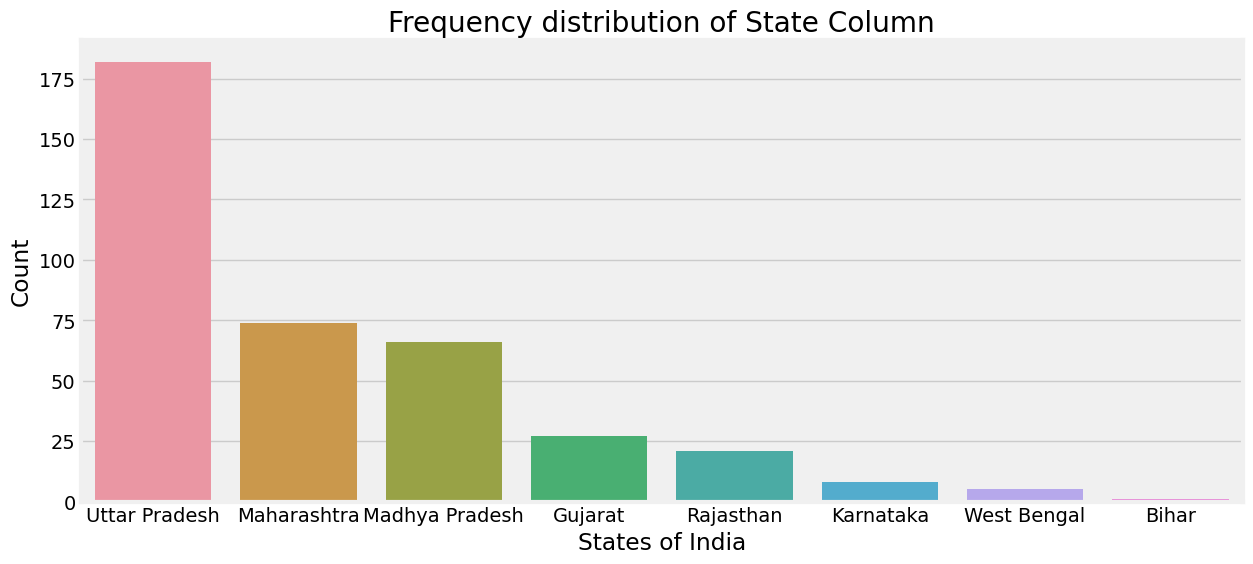

In [15]:
# lets visulaize our state column 
plt.figure(figsize=(15 , 6))
plt.style.use("fivethirtyeight")
sns.countplot(data = df , x= "state" , order = df["state"].value_counts(ascending=False).index)
plt.xlabel("States of India")
plt.ylabel("Count")
plt.title("Frequency distribution of State Column")

from the above observation we can clearly see that:
- Uttar pradesh , maharashtra and madhya pradesh has the highest frequecy distribution
- West Bengal and bihar have the least number of frequecy in our data

In [16]:
df["district"].unique()

array(['Muzaffarpur', 'Amreli', 'Anand', 'Banaskanth', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Mehsana', 'Patan',
       'Rajkot', 'Surendranagar', 'Bangalore', 'Bidar', 'Bijapur',
       'Dharwad', 'Gadag', 'Shimoga', 'Ashoknagar', 'Betul', 'Bhopal',
       'Chhatarpur', 'Datia', 'Dewas', 'Dhar', 'Guna', 'Harda',
       'Hoshangabad', 'Indore', 'Katni', 'Khandwa', 'Khargone',
       'Mandsaur', 'Narsinghpur', 'Panna', 'Rajgarh', 'Ratlam', 'Rewa',
       'Sagar', 'Satna', 'Sehore', 'Shivpuri', 'Tikamgarh', 'Vidisha',
       'Ahmednagar', 'Akola', 'Amarawati', 'Aurangabad', 'Beed',
       'Buldhana', 'Dhule', 'Hingoli', 'Jalana', 'Jalgaon', 'Latur',
       'Nagpur', 'Nanded', 'Nandurbar', 'Nashik', 'Parbhani', 'Pune',
       'Sangli', 'Sholapur', 'Thane', 'Vashim', 'Wardha', 'Yavatmal',
       'Ajmer', 'Alwar', 'Baran', 'Bharatpur', 'Bhilwara', 'Dausa',
       'Ganganagar', 'Jhalawar', 'Kota', 'Swai Madhopur', 'Tonk', 'Agra',
       'Aligarh', 'Allahabad', 'Ambedkarnagar

there are so many unique district in our data
so we'll now check the top value counts of district

In [17]:
top_10_district = df["district"].value_counts().head(10)

In [18]:
top_10_district

district
Nashik           10
Hardoi            9
Banaskanth        8
Harda             8
Sehore            7
Kanpur            7
Sitapur           6
Ahmednagar        6
Raebarelli        6
Jalaun (Orai)     6
Name: count, dtype: int64

<Axes: xlabel='district'>

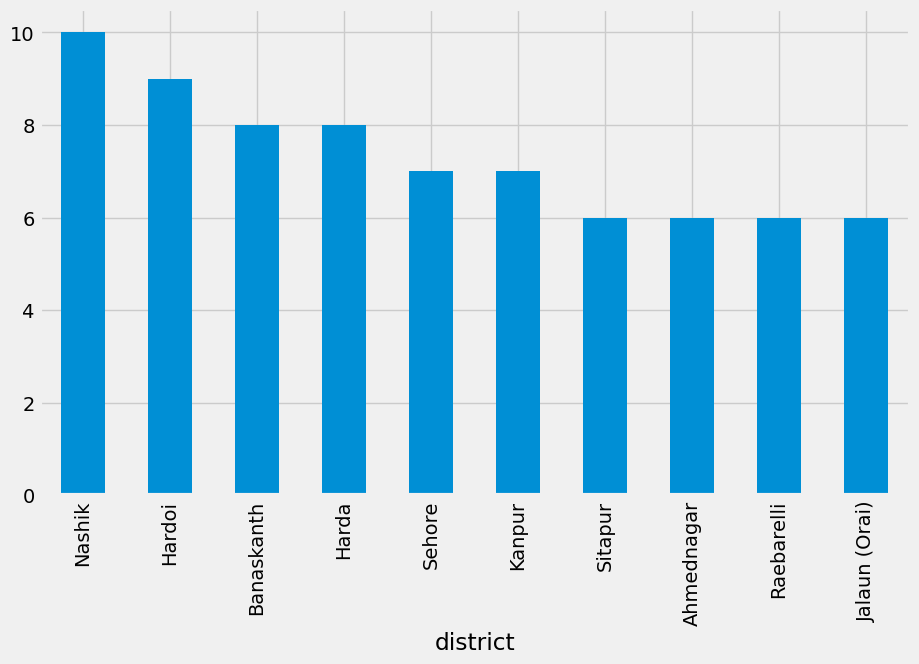

In [19]:
plt.figure(figsize=(10 , 6))
plt.style.use("fivethirtyeight")
df["district"].value_counts(ascending=False).head(10).plot(kind="bar")

In [20]:
df["market"].unique()

array(['Muzaffarpur', 'Bagasara', 'Khambhat(Grain Market)', 'Deesa',
       'Dhanera', 'Palanpur', 'Thara', 'Vadgam', 'Dahod', 'Dehgam',
       'Dhrol', 'Visavadar', 'Kadi', 'Siddhpur', 'Dhoraji', 'Rajkot',
       'Dhragradhra', 'Halvad', 'Bangalore', 'Basava Kalayana', 'Bidar',
       'Bijapur', 'Hubli (Amaragol)', 'Laxmeshwar', 'Shimoga',
       'Ashoknagar', 'Betul', 'Berasia', 'Badamalhera', 'Datia', 'Dewas',
       'Badnawar', 'Dhar', 'Manawar', 'Rajgarh', 'Kumbhraj', 'Harda',
       'Khirakiya', 'Sirali', 'Timarni', 'Babai', 'Hoshangabad',
       'Pipariya', 'Semriharchand', 'Indore', 'Katni', 'Harsood',
       'Khandwa', 'Kasrawad', 'Mandsaur', 'Narsinghpur', 'Ajaygarh',
       'Jeerapur', 'Kurawar', 'Narsinghgarh', 'Pachaur', 'Ratlam',
       'Sailana', 'Baikunthpur', 'Bina', 'Khurai', 'Nagod', 'Satna',
       'Sehore', 'Shyampur', 'Karera', 'Khaniadhana', 'Tikamgarh',
       'Ganjbasoda', 'Sironj', 'Vidisha', 'Jamkhed', 'Kopargaon',
       'Rahata', 'Sangamner', 'Shevgaon', 'S

so here we also have a same problem so we will take top 10 markets area 

In [21]:
df["market"].value_counts()

market
Sehore              6
Rajkot              4
Harda               4
Mandsaur            3
Rampurhat           2
                   ..
Nandgaon            1
Satana              1
Sinner              1
Yeola               1
Khedh(Bodaramev)    1
Name: count, Length: 279, dtype: int64

In [22]:
top_10_market = df["market"].value_counts().head(10)

In [23]:
top_10_market

market
Sehore       6
Rajkot       4
Harda        4
Mandsaur     3
Rampurhat    2
Dankaur      2
Hapur        2
Gazipur      2
Gonda        2
Hardoi       2
Name: count, dtype: int64

Sehore , Rajkot and Harda have the highest frequecy of distribution in our data       

<Axes: ylabel='count'>

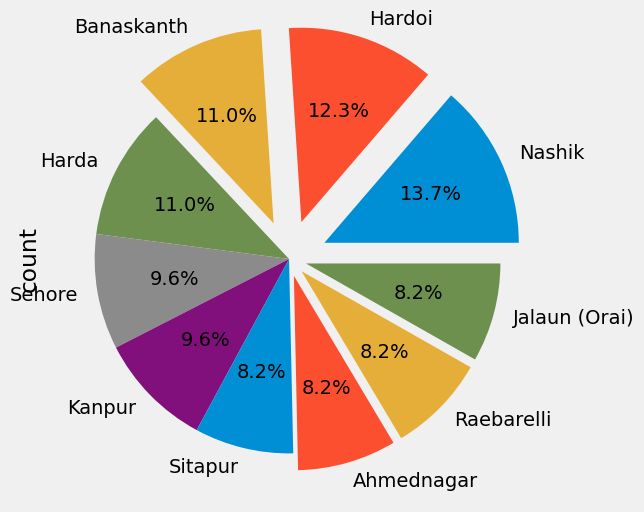

In [24]:
plt.figure(figsize=(10 , 6))
plt.style.use("fivethirtyeight")
explode = [0,0.1]
df["district"].value_counts(ascending=False).head(10).plot(kind="pie", autopct='%1.1f%%', explode = [0.2,0.2,0.2, 0,0,0,0,0.09,0.09,0.09])

In [25]:
df["commodity"].unique()

array(['Wheat'], dtype=object)

we have only one unique category in the commodity column because we are working of the variety of wheat data set

In [26]:
# lets check the value counts of the wheat
df["commodity"].value_counts()

commodity
Wheat    384
Name: count, dtype: int64

so there are 384 total distribution , our data shape is also 384 to that means we have only wheat category and there are no missing values in this columns

- so we dont need to visualize the commodity feature

In [27]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date
0,Bihar,Muzaffarpur,Muzaffarpur,Wheat,147 Average,01/01/2024,2500,2590,2550.0,2024-01-02
1,Gujarat,Amreli,Bagasara,Wheat,Lokwan Gujrat,02/01/2024,2370,2700,2535.0,2024-01-02
2,Gujarat,Anand,Khambhat(Grain Market),Wheat,Other,02/01/2024,2000,2550,2250.0,2024-01-02
3,Gujarat,Banaskanth,Deesa,Wheat,Other,02/01/2024,2415,2590,2500.0,2024-01-02
4,Gujarat,Banaskanth,Dhanera,Wheat,Other,01/01/2024,2715,2715,2715.0,2024-01-02


In [28]:
df["variety"].unique()

array(['147 Average', 'Lokwan Gujrat', 'Other', 'Lokwan', 'Deshi',
       'Hybrid', 'Sharbati', 'PBW-373', 'Local', 'Medium', 'Mexican',
       'Red', 'Sona', 'Jawari', 'Super Fine', 'Mill Quality',
       'Maharashtra 2189', 'Kalyan', 'Dara', 'Sonalika'], dtype=object)

there are many unique values in our data so lets find the frequecy disrtibution of the variety column

In [29]:
df["variety"].value_counts()

variety
Dara                181
Other                85
Mill Quality         39
Lokwan               22
Sharbati             15
Maharashtra 2189     12
Sonalika              5
Local                 4
Lokwan Gujrat         4
Hybrid                3
Red                   2
147 Average           2
PBW-373               2
Deshi                 2
Sona                  1
Jawari                1
Super Fine            1
Medium                1
Kalyan                1
Mexican               1
Name: count, dtype: int64

 so lets see in the visualize form

<Axes: xlabel='count', ylabel='variety'>

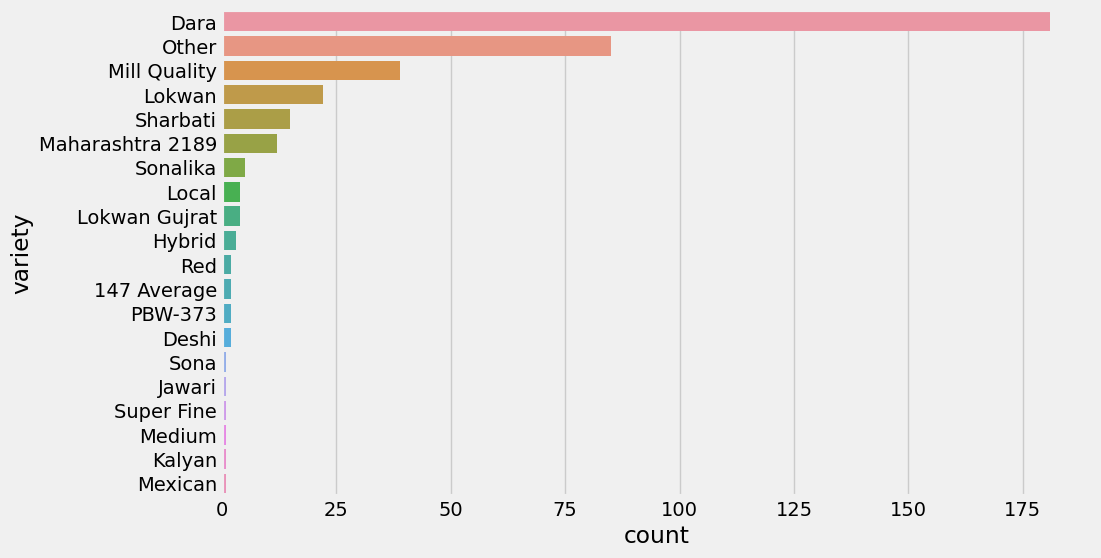

In [30]:
plt.figure(figsize=(10 , 6))
plt.style.use("fivethirtyeight")
sns.countplot(data = df , y = "variety",order = df["variety"].value_counts(ascending=False).index)

Dara has the maximum count of 175 and mexican , kalyan , medium , super fine has the least of 0

In [31]:
df["arrival_date"].unique()

array(['01/01/2024', '02/01/2024'], dtype=object)

In [32]:
df["arrival_date"].value_counts()

arrival_date
01/01/2024    254
02/01/2024    130
Name: count, dtype: int64

<Axes: ylabel='count'>

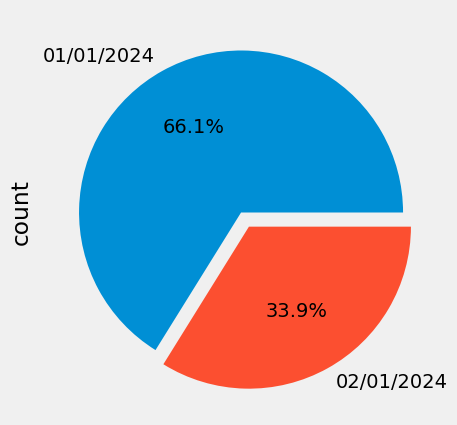

In [33]:
plt.figure(figsize=(10 , 5))
plt.style.use("fivethirtyeight")
explode = [0,0.1]
df["arrival_date"].value_counts().plot(kind="pie", autopct = '%1.1f%%', explode = [0,0.1])

we have more arrival date of 1 januaruy 2024 as compare to 2 january 2024

In [34]:
df["min_price"].min()

1750

In [35]:
df["min_price"].max()

4701

In [36]:
df["min_price"].mean()

2432.8463541666665

<Axes: xlabel='min_price', ylabel='Density'>

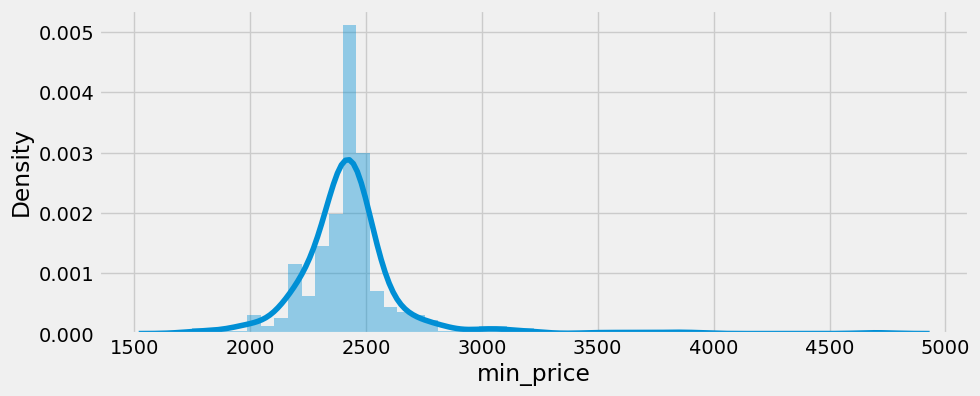

In [37]:
plt.figure(figsize=(10 , 4))
plt.style.use("fivethirtyeight")
sns.distplot(df["min_price"])

From the above observation we can see that min_price feature is normally distributed
- The values varies from 2000 to 3000
- min price value is 1750
- min price value is 4701
- mean price value is 2432
- and the standar deviation is approx 236

In [38]:
df["max_price"].min()

1850

In [39]:
df["max_price"].max()

4701

In [40]:
df["max_price"].mean()

2630.6432291666665

In [41]:
df["max_price"].std()

327.75220740363125

<Axes: xlabel='max_price', ylabel='Density'>

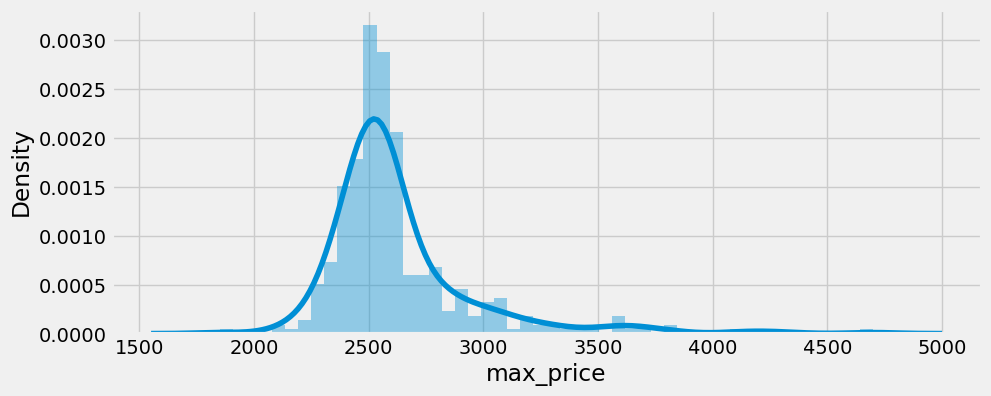

In [42]:
plt.figure(figsize=(10 , 4))
plt.style.use("fivethirtyeight")
sns.distplot(df["max_price"])

from the above observation we can see that our max-price feature is right skewed distributed
from the above observation we can see that modalprice feature is also normal distrubuted 
- min price value is 1850
- max price value is 4701
- mean of max price is 2630
- and the standar deviation is approx 327

In [43]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date
0,Bihar,Muzaffarpur,Muzaffarpur,Wheat,147 Average,01/01/2024,2500,2590,2550.0,2024-01-02
1,Gujarat,Amreli,Bagasara,Wheat,Lokwan Gujrat,02/01/2024,2370,2700,2535.0,2024-01-02
2,Gujarat,Anand,Khambhat(Grain Market),Wheat,Other,02/01/2024,2000,2550,2250.0,2024-01-02
3,Gujarat,Banaskanth,Deesa,Wheat,Other,02/01/2024,2415,2590,2500.0,2024-01-02
4,Gujarat,Banaskanth,Dhanera,Wheat,Other,01/01/2024,2715,2715,2715.0,2024-01-02


In [44]:
df["modal_price"].min()

1800.0

In [45]:
df["modal_price"].max()

4100.0

In [46]:
df["modal_price"].std()

235.9559059191298

<Axes: xlabel='modal_price', ylabel='Density'>

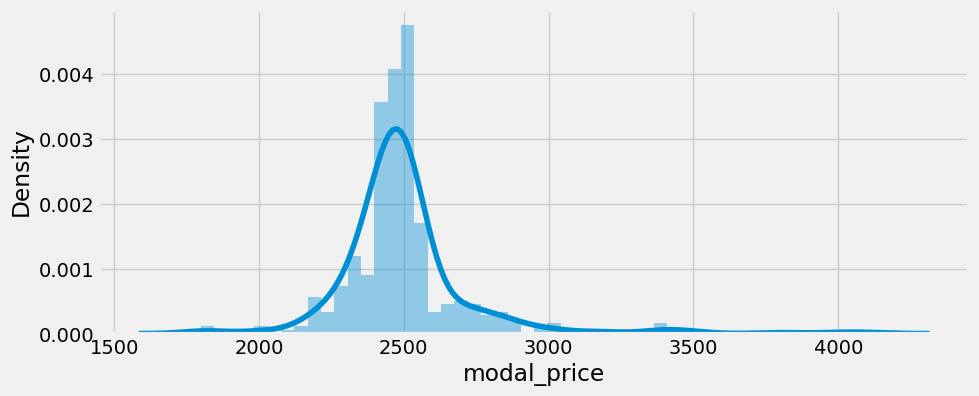

In [47]:
plt.figure(figsize=(10 , 4))
plt.style.use("fivethirtyeight")
sns.distplot(df["modal_price"])

from the above observation we can see that modalprice feature is also normal distrubuted 
- min model price value is 1800
- max modal price value is 4100
- and the standar deviation is approx 236

In [48]:
# checking the last update date column
df["update_date"].unique()

array(['2024-01-02'], dtype=object)

so there is only one unique value is present in our data set

In [49]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date
0,Bihar,Muzaffarpur,Muzaffarpur,Wheat,147 Average,01/01/2024,2500,2590,2550.0,2024-01-02
1,Gujarat,Amreli,Bagasara,Wheat,Lokwan Gujrat,02/01/2024,2370,2700,2535.0,2024-01-02
2,Gujarat,Anand,Khambhat(Grain Market),Wheat,Other,02/01/2024,2000,2550,2250.0,2024-01-02
3,Gujarat,Banaskanth,Deesa,Wheat,Other,02/01/2024,2415,2590,2500.0,2024-01-02
4,Gujarat,Banaskanth,Dhanera,Wheat,Other,01/01/2024,2715,2715,2715.0,2024-01-02


### Lets check if any outlier are their in our data set

<Axes: >

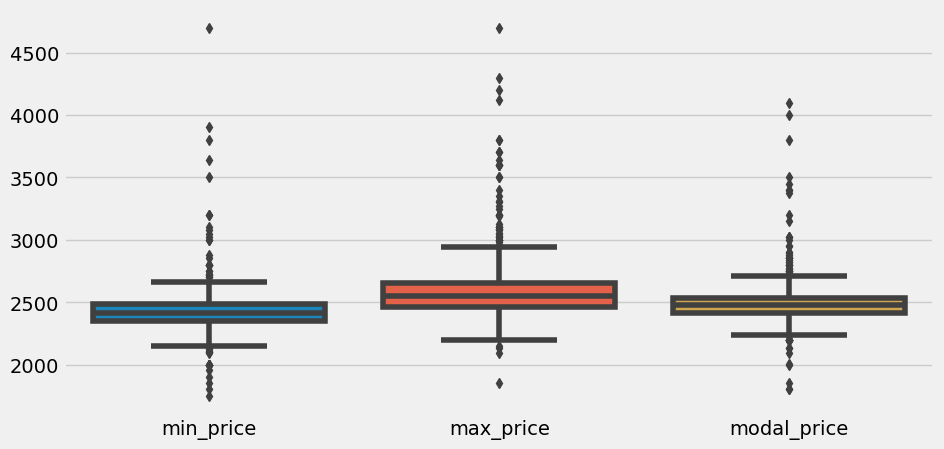

In [50]:
# box plot
plt.figure(figsize=(10 ,5))
plt.style.use("fivethirtyeight")
sns.boxplot(df)

from the above execution we can see that there are many outlier in our min price , max price and modal price column
- so we have to handle it in feature engineering

<Axes: xlabel='modal_price', ylabel='variety'>

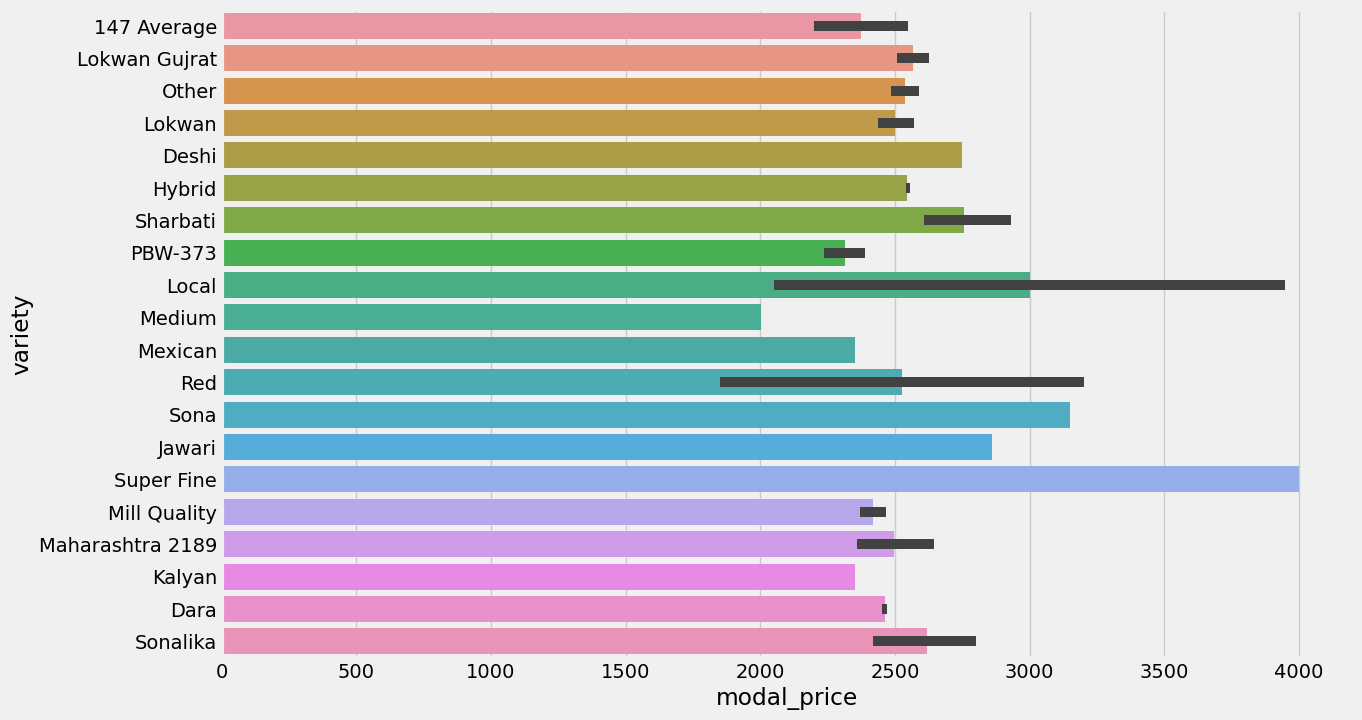

In [51]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(13,8))
sns.barplot(y = df.variety ,x = df.modal_price)

<Axes: xlabel='state', ylabel='modal_price'>

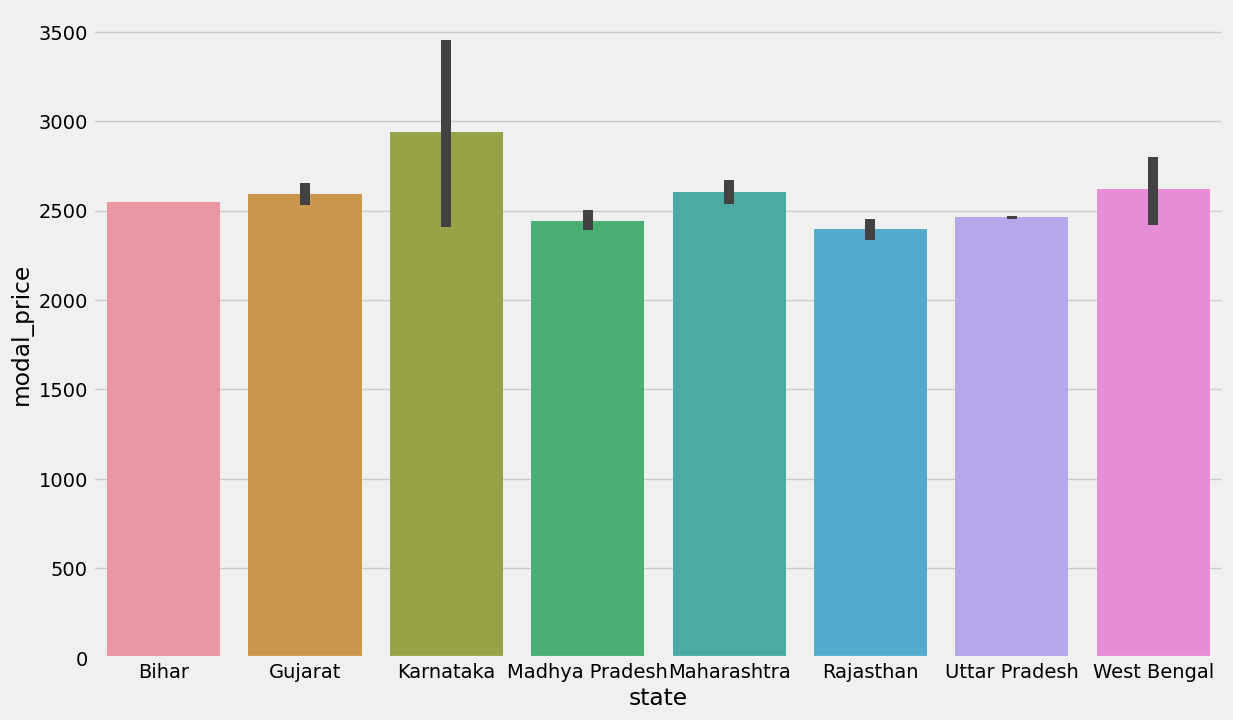

In [52]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(13,8))
sns.barplot(x = df.state ,y = df.modal_price)

### Feature Engineering

In [53]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date
0,Bihar,Muzaffarpur,Muzaffarpur,Wheat,147 Average,01/01/2024,2500,2590,2550.0,2024-01-02
1,Gujarat,Amreli,Bagasara,Wheat,Lokwan Gujrat,02/01/2024,2370,2700,2535.0,2024-01-02
2,Gujarat,Anand,Khambhat(Grain Market),Wheat,Other,02/01/2024,2000,2550,2250.0,2024-01-02
3,Gujarat,Banaskanth,Deesa,Wheat,Other,02/01/2024,2415,2590,2500.0,2024-01-02
4,Gujarat,Banaskanth,Dhanera,Wheat,Other,01/01/2024,2715,2715,2715.0,2024-01-02


In [54]:
df["arrival_date"] = pd.to_datetime(df["arrival_date"], format='%d/%m/%Y')

In [55]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,update_date
0,Bihar,Muzaffarpur,Muzaffarpur,Wheat,147 Average,2024-01-01,2500,2590,2550.0,2024-01-02
1,Gujarat,Amreli,Bagasara,Wheat,Lokwan Gujrat,2024-01-02,2370,2700,2535.0,2024-01-02
2,Gujarat,Anand,Khambhat(Grain Market),Wheat,Other,2024-01-02,2000,2550,2250.0,2024-01-02
3,Gujarat,Banaskanth,Deesa,Wheat,Other,2024-01-02,2415,2590,2500.0,2024-01-02
4,Gujarat,Banaskanth,Dhanera,Wheat,Other,2024-01-01,2715,2715,2715.0,2024-01-02


In [56]:
df.drop(["market", "district", "commodity", "update_date"], axis=1 , inplace=True)

In [57]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   state         384 non-null    object        
 1   variety       384 non-null    object        
 2   arrival_date  384 non-null    datetime64[ns]
 3   min_price     384 non-null    int64         
 4   max_price     384 non-null    int64         
 5   modal_price   384 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 18.1+ KB


In [58]:
cat_feature = [feature for feature in df.columns if df[feature].dtypes == "O"]

In [59]:
cat_feature

['state', 'variety']

In [60]:
le = LabelEncoder()
for i in cat_feature:
    df[i] = le.fit_transform(df[i]) 

In [61]:
df.head()

,state,variety,arrival_date,min_price,max_price,modal_price
0,0,0,2024-01-01,2500,2590,2550.0
1,1,8,2024-01-02,2370,2700,2535.0
2,1,13,2024-01-02,2000,2550,2250.0
3,1,13,2024-01-02,2415,2590,2500.0
4,1,13,2024-01-01,2715,2715,2715.0


In [62]:
df["state"].value_counts()

state
6    182
4     74
3     66
1     27
5     21
2      8
7      5
0      1
Name: count, dtype: int64

In [63]:
df["variety"].value_counts()

variety
1     181
13     85
12     39
7      22
16     15
9      12
18      5
6       4
8       4
3       3
15      2
0       2
14      2
2       2
17      1
4       1
19      1
10      1
5       1
11      1
Name: count, dtype: int64

In [64]:
df.head()

,state,variety,arrival_date,min_price,max_price,modal_price
0,0,0,2024-01-01,2500,2590,2550.0
1,1,8,2024-01-02,2370,2700,2535.0
2,1,13,2024-01-02,2000,2550,2250.0
3,1,13,2024-01-02,2415,2590,2500.0
4,1,13,2024-01-01,2715,2715,2715.0


In [65]:
data = df[(df["min_price"] < 2610 ) & (df["min_price"] >= 2300)]

In [66]:
data.head()

,state,variety,arrival_date,min_price,max_price,modal_price
0,0,0,2024-01-01,2500,2590,2550.0
1,1,8,2024-01-02,2370,2700,2535.0
3,1,13,2024-01-02,2415,2590,2500.0
6,1,13,2024-01-02,2380,2730,2555.0
8,1,13,2024-01-02,2300,2725,2512.5


In [67]:
data.shape

(282, 6)

In [68]:
data.isnull().sum()

state           0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

<Axes: >

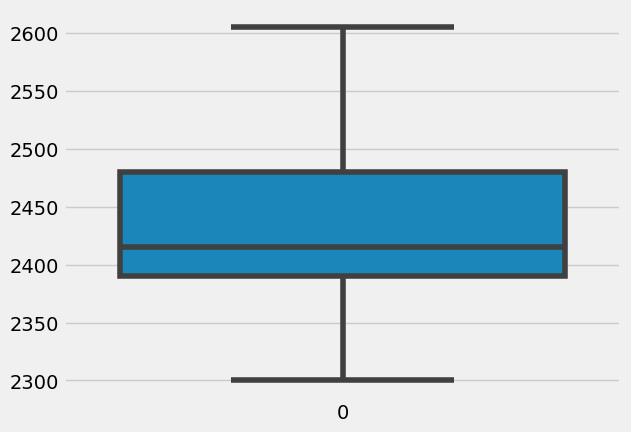

In [69]:
sns.boxplot(data["min_price"])

In [70]:
data = data[(data["max_price"] < 2800 ) & (data["max_price"] > 2300)]

In [71]:
data.shape

(258, 6)

<Axes: >

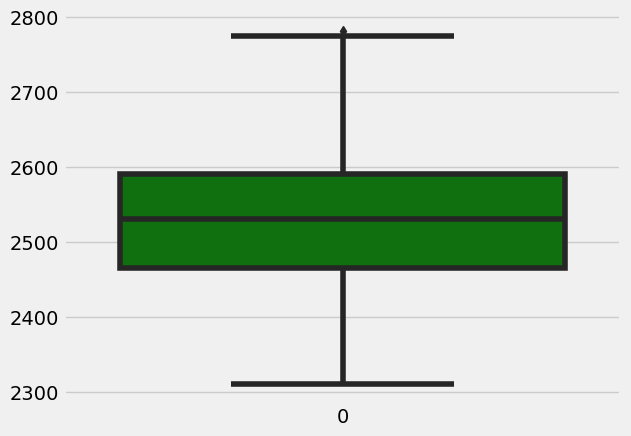

In [72]:
sns.boxplot(data["max_price"],color="green")

In [73]:
data = data[(data["modal_price"] < 2700 ) & (data["modal_price"] >= 2300)]

In [74]:
data.shape

(257, 6)

<Axes: >

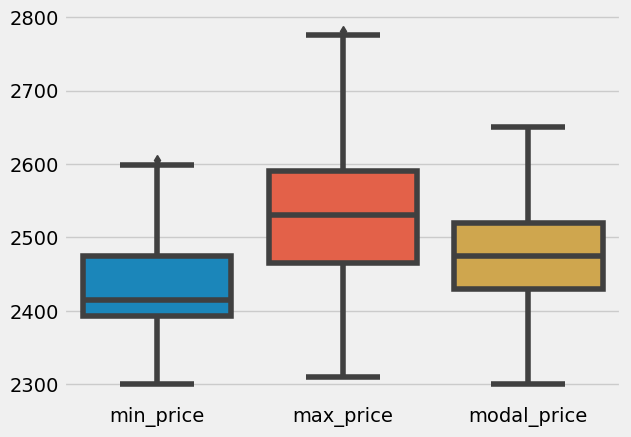

In [75]:
sns.boxplot(data[["min_price", "max_price", "modal_price"]])

In [76]:
data.shape

(257, 6)

In [77]:
# handling object feature
cat_feature

['state', 'variety']

In [78]:
for i in cat_feature:
    data[i] = data[i].astype("int32")

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 382
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   state         257 non-null    int32         
 1   variety       257 non-null    int32         
 2   arrival_date  257 non-null    datetime64[ns]
 3   min_price     257 non-null    int64         
 4   max_price     257 non-null    int64         
 5   modal_price   257 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2)
memory usage: 12.0 KB


In [80]:
cor = data.corr()

<Axes: >

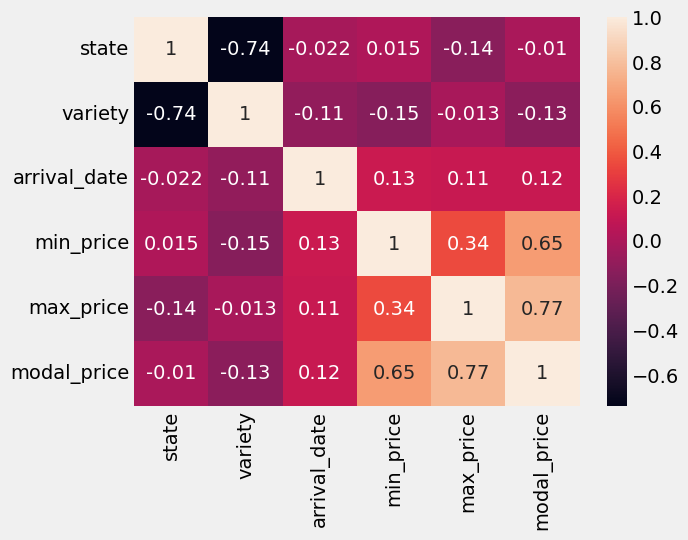

In [81]:
sns.heatmap(cor, annot=True)

In [82]:
# dividing data into x and y 
x = data.drop(["modal_price", "arrival_date"], axis=1)
y = data["modal_price"]

In [83]:
x.shape

(257, 4)

In [84]:
y.shape

(257,)

In [85]:
y

0      2550.0
1      2535.0
3      2500.0
6      2555.0
8      2512.5
        ...  
375    2500.0
376    2500.0
377    2515.0
378    2515.0
382    2400.0
Name: modal_price, Length: 257, dtype: float64

In [86]:
# splitting our data into train and split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [87]:
x_train.shape

(205, 4)

In [88]:
x_train.head()

,state,variety,min_price,max_price
180,5,13,2310,2339
290,6,1,2380,2380
75,3,12,2475,2500
247,6,1,2450,2500
122,4,13,2450,2500


In [89]:
x_test.shape

(52, 4)

In [90]:
lg = LinearRegression()
lg.fit(x_train , y_train)
y_pred_lg = lg.predict(x_test)

In [91]:
lg.score(x_test , y_test)

0.7222995631403841

In [92]:
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)
y_pred_dt = dt.predict(x_test)

In [93]:
dt.score(x_test , y_test)

0.49077220652234244

In [94]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
y_pred_rf = rf.predict(x_test)

In [95]:
rf.score(x_test , y_test)

0.7669188277326184

### Hyper-para-meter tunning

In [96]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [97]:
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf , param_grid=param_grid ,cv=3)

In [98]:
grid_search.fit(x_train , y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391,
                                          445, 500]})

In [99]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=90, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=10)

In [100]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [103]:
grid_predict = grid_search.predict(x_test)

In [104]:
grid_search.score(x_test , y_test)

0.7922545002890466

In [110]:
import pickle

pickle.dump(grid_search , open("rf_model.pkl", "wb"))